# Homework #4: Local Descent
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 6/19/2020|

In [ ]:
using Plots
using Interact

## Algorithm

In [3]:
function strong_backtracking(f, ∇, x, d; α=1, β=1e-4, σ=0.1)
    y0, g0, y_prev, α_prev = f(x), ∇(x)*d, NaN, 0
    αlo, αhi = NaN, NaN
    αs = Float64[]
    
    # bracket phase
    while true
        y = f(x + α*d)
        if y > y0 + β*α*g0 || (!isnan(y_prev) && y ≥ y_prev)
            αlo, αhi = α_prev, α
            break
        end
        g = ∇(x + α*d)*d
#         if abs(g) ≤ -σ*g0
#             return α
#         elseif g ≥ 0
        if g ≥ 0
            αlo, αhi = α, α_prev
            break
        end
        y_prev, α_prev, α = y, α, 2α
        append!(αs, α)
    end
    
    # zoom phase
    ylo = f(x + αlo*d)
    while true
        α = (αlo + αhi)/2
        y = f(x + α*d)
        if y > y0 + β*α*g0 || y ≥ ylo
            αhi = α
        else
            g = ∇(x + α*d)*d
            if abs(g) ≤ -σ*g0
                return αs
            elseif g*(αhi - αlo) ≥ 0
                αhi = αlo
            end
            αlo = α
        end
        append!(αs, α)
    end
end

strong_backtracking (generic function with 1 method)

## Function

In [4]:
f(x) = -cos(x)*(x-2π)
f′(x) = sin(x)*(x-2π) - cos(x)
x₀ = 0.
d = -f′.(x₀)
αs = strong_backtracking(f, f′, x₀, d; α=.32)

6-element Array{Float64,1}:
 0.64
 1.28
 2.56
 5.12
 3.84
 3.2

## Plot

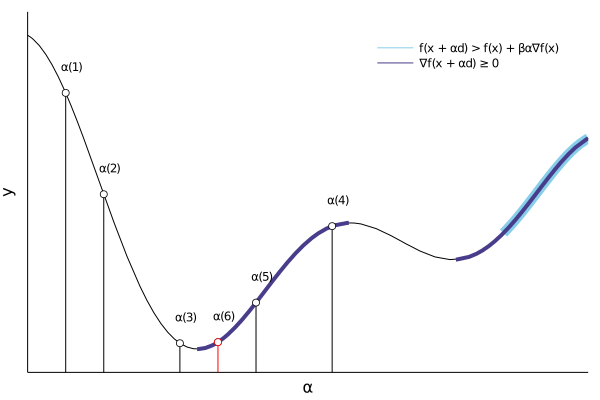

In [5]:
plot(f, 0, 3π, color=:black, label="", legend=:topright,
    foreground_color_legend=nothing)
plot!(f, 8, 3π, line=(10, :skyblue), label="f(x + αd) > f(x) + βα∇f(x)")
plot!(f, 2.85, 5.4, line=(4, :darkslateblue), label="∇f(x + αd) ≥ 0")
plot!(f, 7.2, 3π, line=(4, :darkslateblue), label="")
xaxis!(ylabel="y", xlabel="α", ticks=nothing)
for i in 1:(length(αs)-1)
    plot!([αs[i], αs[i]], [-4, f.(αs[i])],
        color=:black,
        xlims=(0, 3π),
        ylims=(-4, 7),
        label="")
    annotate!(αs[i]+0.1, f.(αs[i])+0.8, text(string("α(", i, ")"), 8))
end
scatter!(αs, f.(αs), marker=:white, label="")
plot!([αs[end], αs[end]], [-4, f.(αs[end])],
    color=:red,
    ylims=(-4, 7),
    label="")
scatter!([αs[end]], [f.(αs[end])], marker=(:white, stroke(:red)), label="")
annotate!(αs[end]+0.1, f.(αs[end])+0.8, text(string("α(", length(αs), ")"), 8))

In [209]:
# WebIO currently not supported in JupyterLab v2.0+

@manipulate for α in αs
    plot(f, 0, 3π, color=:black, legend=:outertopright)
    xaxis!(ylabel="y", xlabel="α")
    scatter!([α], [f(α)])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["α"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 6,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
3, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/stanley/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/stanley/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/stanley/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/stanley/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/stanley/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fbd50f01fc0, Task (runnable) @0x00007fbd50f01fc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.64\",\"1.28\",\"2.56\",\"5.12\",\"3.84\",\"3.2\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"10843922207500532221\",\"id\":\"2352862210410633378\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\